In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

In [4]:
tamanho = 0.25 # Fração de dados escolhida para treino e teste
seed = 567

i = df_chem.index
i_treino, i_teste = train_test_split(i, test_size=tamanho, random_state = seed) #Split entre dados treino e teste

df_treino = df_chem.loc[i_treino]
df_teste = df_chem.loc[i_teste]

print(df_treino)
print()
print(df_teste)

     Mohs Hardness  Specific Gravity  Refractive Index   Molar Mass  \
615           0.00             5.700             1.737   298.038100   
194           5.50             4.650             2.120   123.842500   
306           4.50             2.285             1.516   257.230046   
82            0.00             4.380             1.793   426.292200   
339           3.00             6.420             2.358  1560.452603   
..             ...               ...               ...          ...   
64            2.50             1.715             1.513   155.071500   
29            6.25             2.625             1.535   411.331124   
762           5.50             0.000             1.495   340.284075   
367           1.00             3.197             1.641   490.595370   
250           5.00             4.535             2.069   656.503600   

     Molar Volume  Calculated Density  
615      0.033606               7.361  
194      0.011210               9.169  
306      0.033718          

In [5]:
print(train_test_split.__doc__)

Split arrays or matrices into random train and test subsets

    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.

    Read more in the :ref:`User Guide <cross_validation>`.

    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and re

In [10]:
# Modelo preditivo
# Definições de atributos e targets
nome = 'df_chem'
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density']
target = ["Refractive Index"]

X_treino = df_treino.reindex(atributos, axis=1).values
y_treino = df_treino.reindex(target, axis=1).values
X_teste = df_teste.reindex(atributos, axis=1).values
y_teste = df_teste.reindex(target, axis=1).values

In [11]:
from sklearn.neighbors import KNeighborsRegressor

# criação do modelo K-NN
modelo_knn = KNeighborsRegressor()

# treinamento do modelo
modelo_knn.fit(X_treino, y_treino)

# realiza uma previsão usando o modelo treinado
previsao = modelo_knn.predict(X_teste)
print(previsao)

[[1.8666]
 [1.5868]
 [1.5968]
 [1.8562]
 [1.7724]
 [1.574 ]
 [1.6042]
 [1.6064]
 [1.8562]
 [1.7314]
 [1.554 ]
 [1.9476]
 [1.6026]
 [1.643 ]
 [1.7646]
 [1.792 ]
 [1.6702]
 [1.4204]
 [1.6222]
 [1.6072]
 [1.813 ]
 [1.7136]
 [1.807 ]
 [1.6184]
 [1.589 ]
 [1.8672]
 [1.8448]
 [1.5962]
 [1.6896]
 [1.6272]
 [1.9178]
 [1.5988]
 [1.6378]
 [1.771 ]
 [1.6404]
 [1.8344]
 [1.5968]
 [1.6272]
 [1.4204]
 [1.759 ]
 [1.6938]
 [1.5968]
 [1.6378]
 [1.753 ]
 [1.721 ]
 [1.9646]
 [1.6222]
 [1.709 ]
 [1.6196]
 [1.8744]
 [1.893 ]
 [1.595 ]
 [1.7308]
 [1.6036]
 [1.6368]
 [1.7366]
 [1.6572]
 [1.7726]
 [1.7952]
 [1.609 ]
 [1.5944]
 [1.7394]
 [1.6784]
 [1.5968]
 [1.6306]
 [1.7524]
 [1.7736]
 [1.596 ]
 [1.7232]
 [1.776 ]
 [1.7136]
 [1.6152]
 [1.6248]
 [1.617 ]
 [1.6288]
 [1.6024]
 [1.6528]
 [1.6378]
 [1.6842]
 [1.6688]
 [1.6484]
 [1.7598]
 [1.549 ]
 [1.6404]
 [1.8698]
 [1.768 ]
 [1.789 ]
 [1.74  ]
 [1.6916]
 [1.7388]
 [1.7642]
 [1.8498]
 [1.723 ]
 [1.617 ]
 [1.5636]
 [1.7108]
 [1.8994]
 [1.7454]
 [1.6354]
 [1.8324]


In [12]:
print(modelo_knn.__doc__)
print(modelo_knn.predict.__doc__)

Regression based on k-nearest neighbors.

    The target is predicted by local interpolation of the targets
    associated of the nearest neighbors in the training set.

    Read more in the :ref:`User Guide <regression>`.

    .. versionadded:: 0.9

    Parameters
    ----------
    n_neighbors : int, default=5
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    weights : {'uniform', 'distance'} or callable, default='uniform'
        weight function used in prediction.  Possible values:

        - 'uniform' : uniform weights.  All points in each neighborhood
          are weighted equally.
        - 'distance' : weight points by the inverse of their distance.
          in this case, closer neighbors of a query point will have a
          greater influence than neighbors which are further away.
        - [callable] : a user-defined function which accepts an
          array of distances, and returns an array of the same shape
          containing the weigh

In [13]:
y_verdadeiro = y_teste
y_previsao = modelo_knn.predict(X_teste)

RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)

print(f"O RMSE do modelo k-NN foi um Indice Refrativo de {RMSE}.")

O RMSE do modelo k-NN foi um Indice Refrativo de 0.25713131085188395.


In [14]:
print(mean_squared_error.__doc__)

Mean squared error regression loss.

    Read more in the :ref:`User Guide <mean_squared_error>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.

    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

    multioutput : {'raw_values', 'uniform_average'} or array-like of shape             (n_outputs,), default='uniform_average'
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.

        'raw_values' :
            Returns a full set of errors in case of multioutput input.

        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.

    squared : bool, default=True
        If True returns MSE value, if False returns RMSE value.

    Returns
    

In [15]:
nn_vizinhos = [5, 20, 200] # Conjunto de Hiperparâmetros

#Treino do modelo de k-nn vizinhos utilizando o dataset de treino e teste

for n in nn_vizinhos:
    modelo_knn = KNeighborsRegressor(n_neighbors=n)
    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi um Indice Refrativo de {RMSE}.")

O RMSE do modelo k-NN usando k=5 foi um Indice Refrativo de 0.25713131085188395.
O RMSE do modelo k-NN usando k=20 foi um Indice Refrativo de 0.25529086322651423.
O RMSE do modelo k-NN usando k=200 foi um Indice Refrativo de 0.2563370650249633.


In [16]:
k_valores = range(1,200)
RMSE_lista = []
for i in k_valores:
    modelo_knn = KNeighborsRegressor(n_neighbors=i)
    modelo_knn.fit(X_treino, y_treino)
    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE_valores = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    RMSE_lista.append(RMSE_valores)
    print(RMSE_lista)

[0.31436636411097446]
[0.31436636411097446, 0.2595922168471525]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516, 0.25713131085188395]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516, 0.25713131085188395, 0.25153137478630705]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516, 0.25713131085188395, 0.25153137478630705, 0.2506755642493525]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516, 0.25713131085188395, 0.25153137478630705, 0.2506755642493525, 0.24913937771468653]
[0.31436636411097446, 0.2595922168471525, 0.26182189309472137, 0.25348237453653516, 0.25713131085188395, 0.25153137478630705, 0.2506755642493525, 0.24913937771468653, 0.24709829688032175]
[0.31436636411097446, 0.2595922168471525, 0.2618218930947

[Text(0.5, 0, 'K-values'), Text(0, 0.5, 'RMSE')]

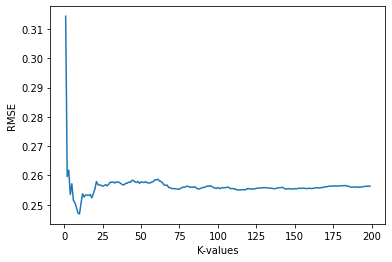

In [17]:
relacao_k_RMSE = sns.lineplot(x = k_valores , y = RMSE_lista)
relacao_k_RMSE.set(xlabel = "K-values", ylabel = "RMSE")

### Desempenho do modelo

**O desempenho do método K-NN mostrou que os vizinhos de interesse são os vizinhos mais próximos, ou seja, quanto menor o número de vizinhos definido por k, menor será o RMSE**

**O RMSE por K-NN foi menor do que o modelo baseline, com um RMSE de 0.6461 com k = 200 contra um RMSE de 0.649 do modelo baseline.**

### Modelo com conjunto de hiperparâmetros



##### Hiperparâmetros: O número de n vizinhos, dado por K;
##### Função de peso para definir os valores;
##### Algorítmo que irá computar os n-vizinhos;
##### Métrica que computa a distância entre os vizinhos
##### Número de trabalhos sendo executados em paralelo para procurar por vizinhos próximos;

In [18]:
nn_vizinhos = [2, 5, 10] # Conjunto de Hiperparâmetros

#Treino do modelo de k-nn vizinhos utilizando o dataset de treino e teste

for n in nn_vizinhos:
    modelo_knn = KNeighborsRegressor(n_neighbors=n, 
                weights ='distance', 
                algorithm = 'auto', 
                leaf_size = 30, 
                p =2, 
                metric = 'minkowski', 
                n_jobs = None)

    modelo_knn.fit(X_treino, y_treino)

    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE = mean_squared_error(y_verdadeiro, y_previsao, squared=False)
    print(f"O RMSE do modelo k-NN usando k={n} foi um Indice Refrativo de {RMSE}.")

O RMSE do modelo k-NN usando k=2 foi um Indice Refrativo de 0.2674768748831317.
O RMSE do modelo k-NN usando k=5 foi um Indice Refrativo de 0.25848919336203396.
O RMSE do modelo k-NN usando k=10 foi um Indice Refrativo de 0.24936169368786962.


In [19]:
k_valores2 = range(2,10) #Range de valores K
RMSE_lista2 = []
for i in k_valores2:
    modelo_knn = KNeighborsRegressor(n_neighbors=i, # Modelo KNN e seus hiperparâmetros
                weights ='distance', 
                algorithm = 'auto', 
                leaf_size = 30, 
                p =2, 
                metric = 'minkowski', 
                n_jobs = None)
    modelo_knn.fit(X_treino, y_treino)
    y_verdadeiro = y_teste
    y_previsao = modelo_knn.predict(X_teste)
    RMSE_valores2 = mean_squared_error(y_verdadeiro, y_previsao, squared=False) #Raiz quadrada do erro quadrático médio
    RMSE_lista2.append(RMSE_valores2)
    print(RMSE_lista2)

[0.2674768748831317]
[0.2674768748831317, 0.2629079113860908]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556, 0.25848919336203396]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556, 0.25848919336203396, 0.25501187852275337]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556, 0.25848919336203396, 0.25501187852275337, 0.2539591343793702]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556, 0.25848919336203396, 0.25501187852275337, 0.2539591343793702, 0.2513498757569806]
[0.2674768748831317, 0.2629079113860908, 0.25734102961540556, 0.25848919336203396, 0.25501187852275337, 0.2539591343793702, 0.2513498757569806, 0.24990928870437695]


[Text(0.5, 0, 'K-values com peso'), Text(0, 0.5, 'RMSE')]

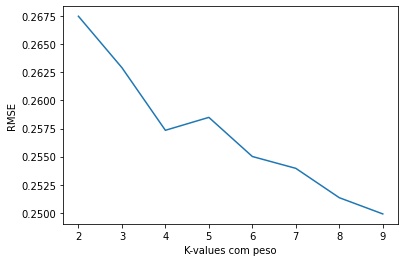

In [20]:
relacao_k_RMSE2 = sns.lineplot(x = k_valores2 , y = RMSE_lista2)
relacao_k_RMSE2.set(xlabel = "K-values com peso", ylabel = "RMSE")

Ao definir o peso dos pontos vizinhos mais próximos baseados pela distância, vimos que, em torno de um valor k de 5 vizinhos, temos maior influência dos pontos no RMSE, diminuindo-o.